In [1]:
import matplotlib.pyplot as plt
import numpy as np
from obspy.core.trace import Trace, Stats
from obspy.core.stream import Stream
from obspy import UTCDateTime
import obspy
from obspy.clients.fdsn import Client

client = Client("IRIS")

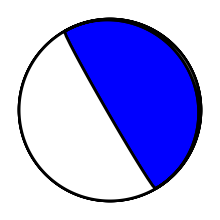

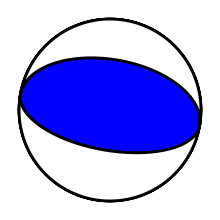

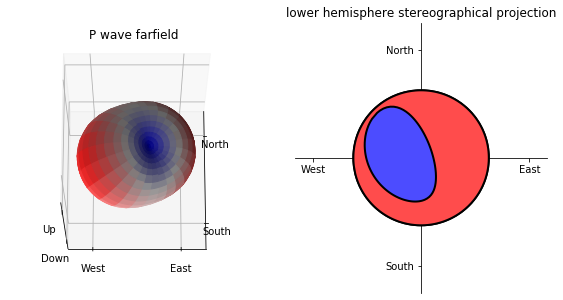

In [14]:
from obspy.imaging.beachball import beachball
from obspy.imaging.beachball import beach
from obspy.imaging.source import plot_radiation_pattern

#(strike, dip, and rake)
np1 = [150, 87, 90]
fig = beachball(np1)

np2 = [100, 50, 90]
fig2 = beachball(np2)

mt = [-2.39, 1.04, 1.35, 0.57, -2.94, -0.94]
plot_radiation_pattern(mt);

In [15]:
def getmt(fault):
    rad = 180./np.pi; m0 = 1
    st,dp,rk = fault

    st = st/rad; dp = dp/rad; rk = rk/rad
    sd = np.sin(dp); cd = np.cos(dp)
    sd2 = np.sin(2*dp); cd2 = np.cos(2*dp)
    ss = np.sin(st); cs = np.cos(st)
    ss2 = np.sin(2*st); cs2 = np.cos(2*st)
    sr = np.sin(rk); cr = np.cos(rk)

    # formulas from Aki & Richards Box 4.4
    # mt(1-6): Mrr, Mtt, Mff, Mrt, Mrf, Mtf
    # mt(1-6): Mzz, Mxx, Myy, Mzx, -Mzy, -Mxy
    mt = [ sr*sd2, -1.*sd*cr*ss2 - sd2*sr*ss*ss, sd*cr*ss2 - sd2*sr*cs*cs, -1.*cd*cr*cs - cd2*sr*ss, cd*cr*ss - cd2*sr*cs, -1.*sd*cr*cs2 - 0.5*sd2*sr*ss2]
    return mt

<IPython.core.display.Javascript object>


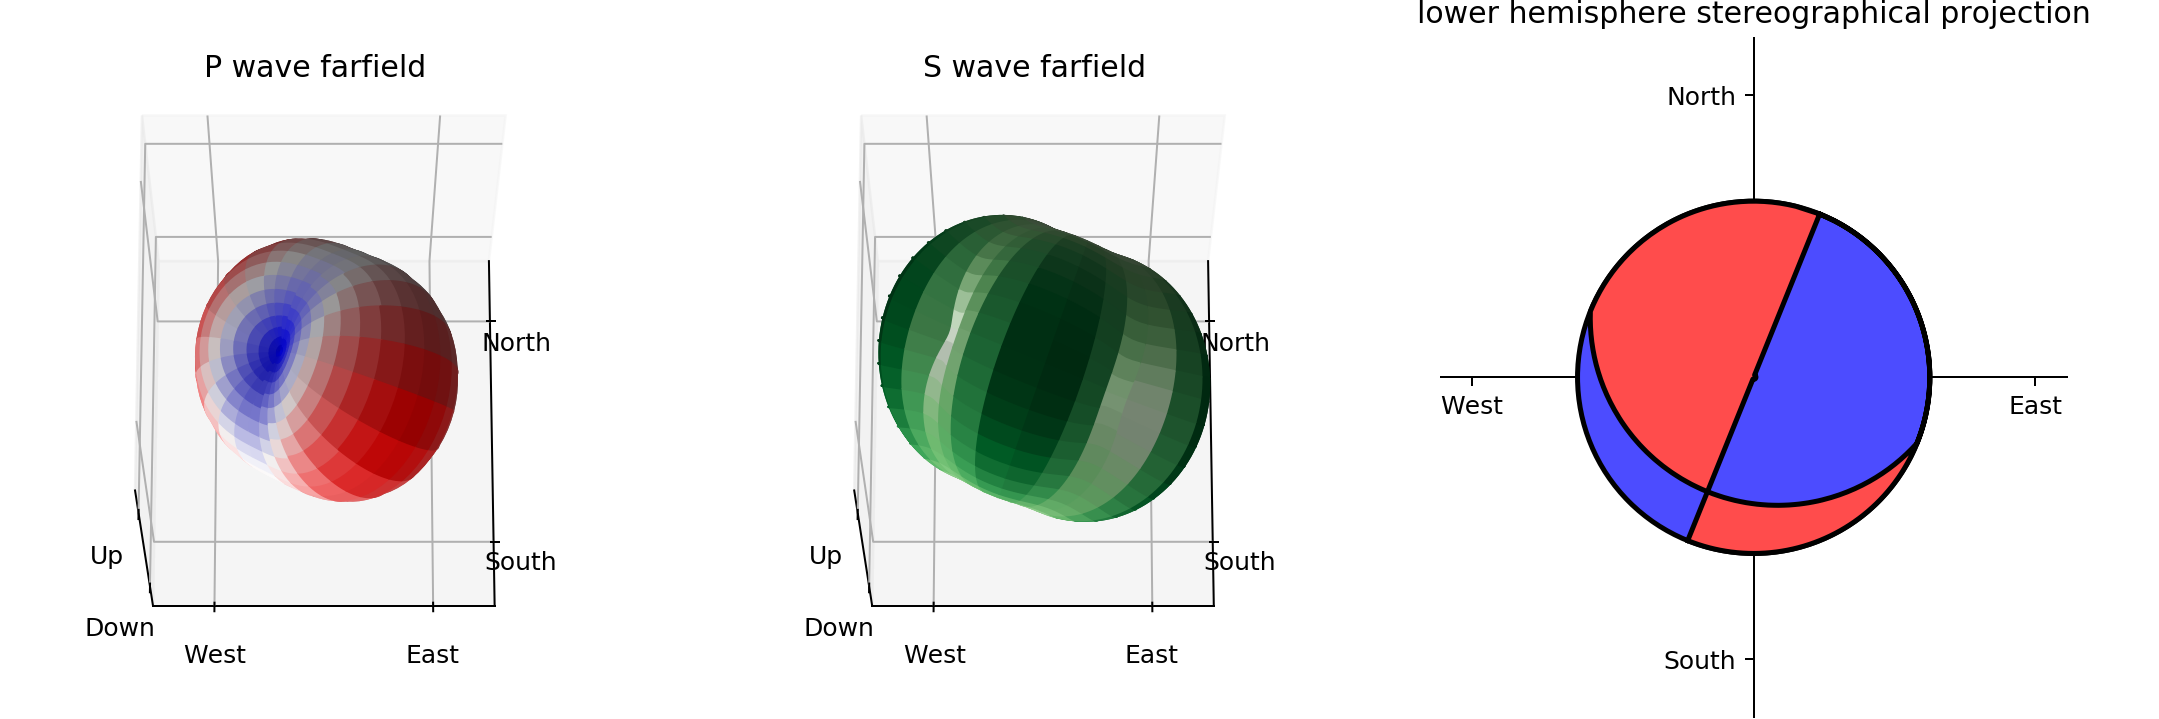

<IPython.core.display.Javascript object>


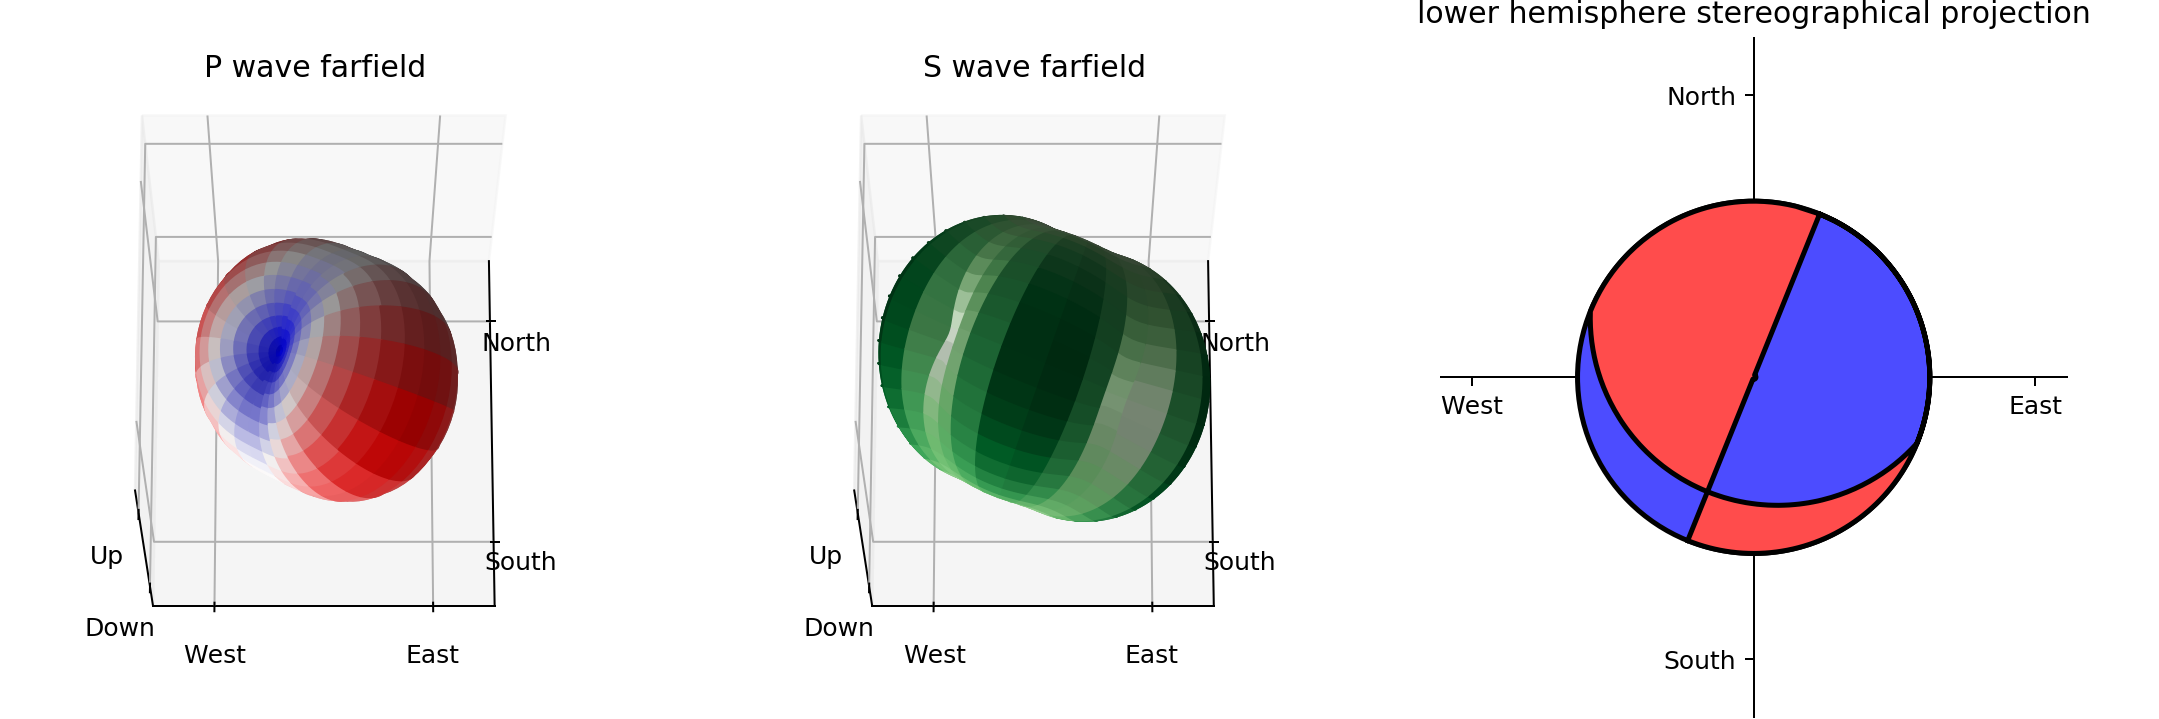

In [21]:
%matplotlib notebook
s0173a = [112, 20, 0]
mt = getmt(s0173a)
plot_radiation_pattern(mt, kind=['p_sphere', 's_sphere', 'beachball'])